In [2]:
import json
import pyrender
import trimesh
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])        
    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])     
    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
    R = np.dot(R_z, np.dot( R_y, R_x ))

    return R


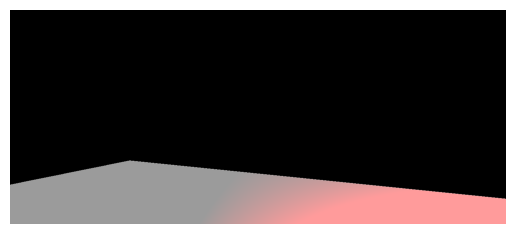

In [35]:
car_trimesh = trimesh.load('./dazhong.obj')
car_trimesh.visual.vertex_colors  = [200, 0, 0, 100]

mesh = pyrender.Mesh.from_trimesh(car_trimesh)
scene = pyrender.Scene()
scene.add(mesh)
fx = 2304.5479
fy = 2305.8757
cx = 1686.2379
cy = 1354.9849
camera = pyrender.IntrinsicsCamera(fx,fy,cx,cy)
s = np.sqrt(2)/2
R = eulerAnglesToRotationMatrix([0.0,0.0,np.pi])
T = np.array([[0.0,0.0,2.5]])
RT = np.hstack((R,T.T))
camera_pose = np.vstack((RT,[0.0,0.0,0.0,1.0]))

scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=5.0,
                            innerConeAngle=np.pi/16.0,
                            outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)

r = pyrender.OffscreenRenderer(1480, 640)
color, depth = r.render(scene)
mask = depth > 0.0
mask = np.expand_dims(mask, axis=2)
mask = np.concatenate((mask, mask, mask), axis=-1)

color = color * mask

plt.figure()
plt.axis('off')
plt.imshow(color)
plt.show()